# Figure 1: Plot distributions of different technologies

In [1]:
import cytovi
import anndata as ad
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import readfcs

/home/labs/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_use_gpu' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [2]:
os.chdir('/home/labs/amit/floriani/Lab/PROJECTS/FlowVI/notebooks/')
figure_dir = '../figures/PPCs/'

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["savefig.dpi"] = 300

## Part 1 - Beads

In [ ]:
data_dir = '../data/raw/Flow cytometry/Beads/raw/gated'
fcs_files = os.listdir(data_dir)
adata_list = []
sample_num = 0
vars_keep = ['FSC-A', 'FSC-H', 'SSC-A', 'SSC-H', 'FJComp-BUV395-A', 'BV421', 'FJComp-PE-A', 'FJComp-Pacific Blue-A', 'FJComp-RB780-A']

for fcs_file in fcs_files:
    if fcs_file.endswith('.fcs'):
        fcs_path = os.path.join(data_dir, fcs_file)
        adata = readfcs.read(fcs_path)
        adata = adata[:, [var for var in adata.var_names if var in vars_keep]]

        # add md
        adata.obs['filename'] = fcs_file
        adata.obs['sample_id'] = sample_num
        adata.obs['fluorophore'] = fcs_file.split('_')[1]
        adata.obs['population'] = fcs_file.split('_')[-1].split(".")[0]

        adata.layers['raw'] = adata.X.copy()
    
        sample_num += 1
        adata_list.append(adata)

In [ ]:
# concat adatas and preprocess
adata = ad.concat(adata_list)
cytovi.pp.arcsinh(adata, global_scaling_factor=2000, transform_scatter=True)
cytovi.pp.scale(adata)

# save adata
adata.write('../data/raw/Flow cytometry/Beads/processed/2024-05-16_beads_preproccessed.h5ad')

In [3]:
# read beads
adata_beads = ad.read_h5ad('../data/raw/Flow cytometry/Beads/processed/2024-05-16_beads_preproccessed.h5ad')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [4]:
# define aesthetics
aes_raw = {'color': '#00A9B8', 'alpha': 0.5}
aes_trans = {'color': '#F6B319', 'alpha': 0.5}
aspect = 0.8

scatter_features = ['FSC-A', 'SSC-A', 'FSC-H', 'SSC-H']

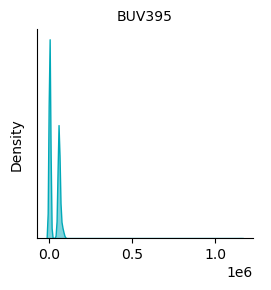

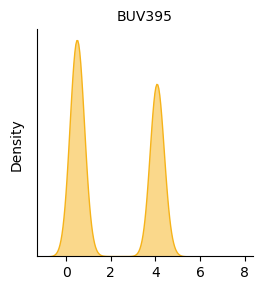

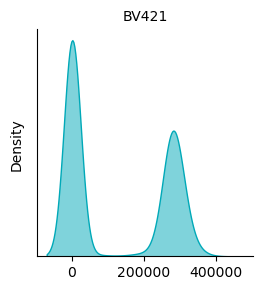

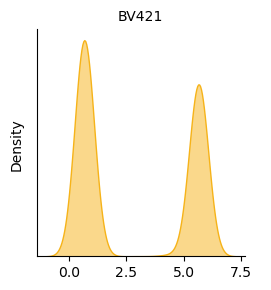

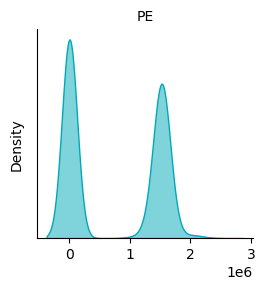

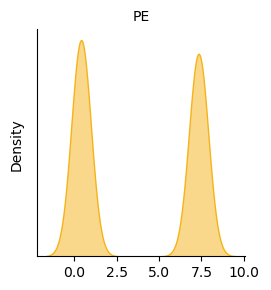

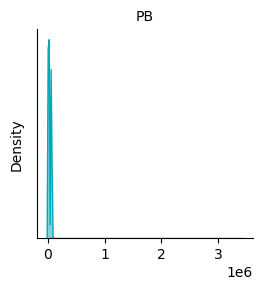

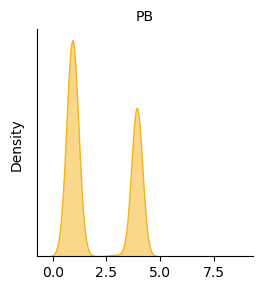

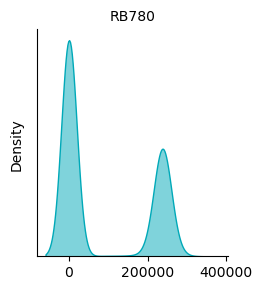

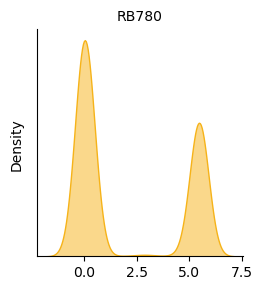

In [5]:
# plot histograms for protein features
for var in adata_beads.var_names:
    if var not in scatter_features:
        adata_temp = adata_beads[adata_beads.obs['fluorophore']==var]
        cytovi.pl.histogram(adata_temp, marker = var, kde_kwargs = aes_raw, aspect = aspect, layer_key='raw', save=f'{figure_dir}beads_hist_{var}_raw.pdf')
        cytovi.pl.histogram(adata_temp, marker = var, kde_kwargs = aes_trans, aspect = aspect, layer_key='transformed', save=f'{figure_dir}beads_hist_{var}_trans.pdf')


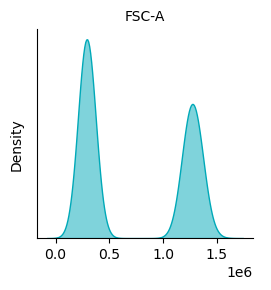

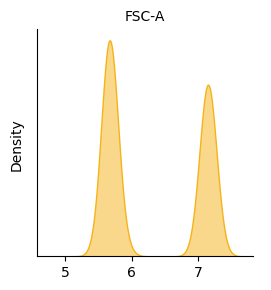

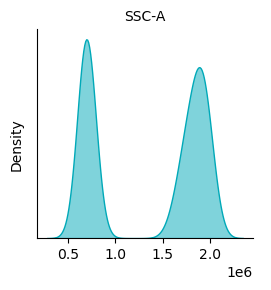

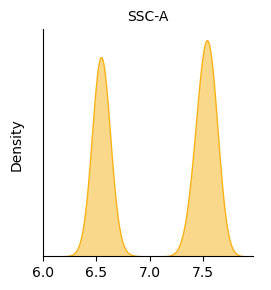

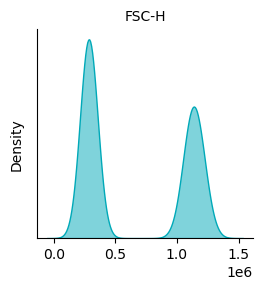

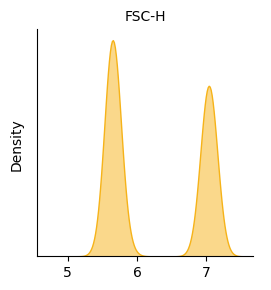

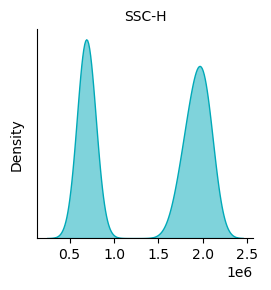

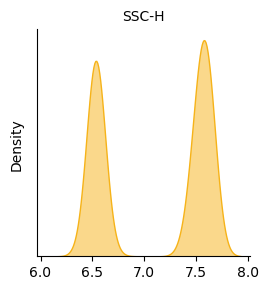

In [6]:
# plot histograms for scatter features
adata_beads_FSC = adata_beads[adata_beads.obs['fluorophore']=='BV421', scatter_features]

for var in scatter_features:
    cytovi.pl.histogram(adata_beads_FSC, marker = var, kde_kwargs = aes_raw, aspect = aspect, layer_key='raw', save=f'{figure_dir}beads_hist_{var}_raw.pdf')
    cytovi.pl.histogram(adata_beads_FSC, marker = var, kde_kwargs = aes_trans, aspect = aspect, layer_key='transformed', save=f'{figure_dir}beads_hist_{var}_trans.pdf')

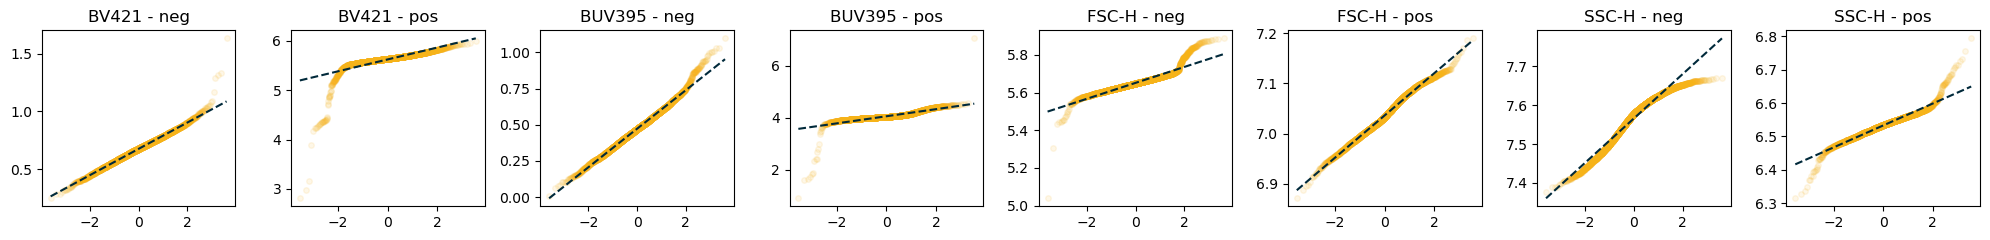

In [14]:
# Prob plots for protein features
var = 'BV421'
adata_beads_var = adata_beads[adata_beads.obs['fluorophore']==var]

var_pos = np.where(adata_beads.var_names == var)[0][0]

fig, axes = plt.subplots(1, 8, figsize=(8*2.5, 2.5))
it = 0
for pos in ['neg', 'pos']:
    adata_temp = adata_beads_var[adata_beads_var.obs['population']==pos]

    stats.probplot(adata_temp.layers['transformed'][:,var_pos], plot=axes[it])
    axes[it].get_lines()[0].set_color('#F6B319')
    axes[it].get_lines()[0].set_alpha(0.1)
    axes[it].get_lines()[0].set_markersize(4)
    axes[it].get_lines()[1].set_color('#00293A')
    axes[it].get_lines()[1].set_linestyle('--')
    axes[it].set_xlabel('')
    axes[it].set_ylabel('')
    axes[it].set_title(f'{var} - {pos}')
    it += 1

var = 'BUV395'
adata_beads_var = adata_beads[adata_beads.obs['fluorophore']==var]

var_pos = np.where(adata_beads.var_names == var)[0][0]

for pos in ['neg', 'pos']:
    adata_temp = adata_beads_var[adata_beads_var.obs['population']==pos]

    stats.probplot(adata_temp.layers['transformed'][:,var_pos], plot=axes[it])
    axes[it].get_lines()[0].set_color('#F6B319')
    axes[it].get_lines()[0].set_alpha(0.1)
    axes[it].get_lines()[0].set_markersize(4)
    axes[it].get_lines()[1].set_color('#00293A')
    axes[it].get_lines()[1].set_linestyle('--')
    axes[it].set_xlabel('')
    axes[it].set_ylabel('')
    axes[it].set_title(f'{var} - {pos}')
    it += 1


var = 'FSC-H'
adata_beads_var = adata_beads[adata_beads.obs['fluorophore']=='BV421']

var_pos = np.where(adata_beads.var_names == var)[0][0]

for pos in ['neg', 'pos']:
    adata_temp = adata_beads_var[adata_beads_var.obs['population']==pos]

    stats.probplot(adata_temp.layers['transformed'][:,var_pos], plot=axes[it])
    axes[it].get_lines()[0].set_color('#F6B319')
    axes[it].get_lines()[0].set_alpha(0.1)
    axes[it].get_lines()[0].set_markersize(4)
    axes[it].get_lines()[1].set_color('#00293A')
    axes[it].get_lines()[1].set_linestyle('--')
    axes[it].set_xlabel('')
    axes[it].set_ylabel('')
    axes[it].set_title(f'{var} - {pos}')
    it += 1

var = 'SSC-H'
adata_beads_var = adata_beads[adata_beads.obs['fluorophore']=='BV421']

var_pos = np.where(adata_beads.var_names == var)[0][0]

for pos in ['neg', 'pos']:
    adata_temp = adata_beads_var[adata_beads_var.obs['population']==pos]

    stats.probplot(adata_temp.layers['transformed'][:,var_pos], plot=axes[it])
    axes[it].get_lines()[0].set_color('#F6B319')
    axes[it].get_lines()[0].set_alpha(0.1)
    axes[it].get_lines()[0].set_markersize(4)
    axes[it].get_lines()[1].set_color('#00293A')
    axes[it].get_lines()[1].set_linestyle('--')
    axes[it].set_xlabel('')
    axes[it].set_ylabel('')
    axes[it].set_title(f'{var} - {pos}')
    it += 1

fig.tight_layout()
fig.savefig(f'{figure_dir}beads_probplot_combined.png')

## Part 2 - Flow cytometry

In [3]:
# read flow data
adata_flow = ad.read_h5ad('../data/raw/Spectral flow/Nunez/For Chiquito/annotated/2024-01-24_norm_sample_batch1_ann.h5ad')
cytovi.pp.arcsinh(adata_flow, global_scaling_factor=2000, transform_scatter=True)

In [86]:
# define markers
markers_to_plot = ['CD3', 'CD4', 'CD27', 'CD19', 'CD45RA']

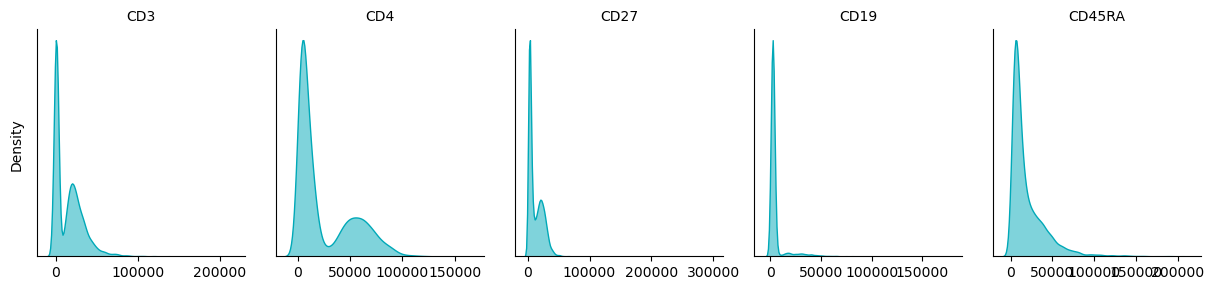

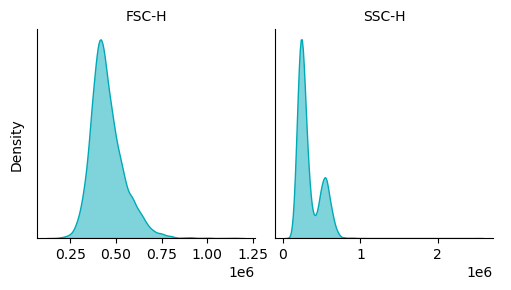

In [9]:
# plot scatter feature and markers; raw layer
cytovi.pl.histogram(adata_flow, marker= markers_to_plot, layer_key='raw', col_wrap=5, kde_kwargs = aes_raw, save = figure_dir + 'flow_marker_histogram_raw.pdf', aspect = aspect)
cytovi.pl.histogram(adata_flow, marker= ['FSC-H', 'SSC-H'], layer_key='raw', col_wrap=2, kde_kwargs = aes_raw, save = figure_dir + 'scatter_feature_histogram_raw.pdf', aspect = aspect)

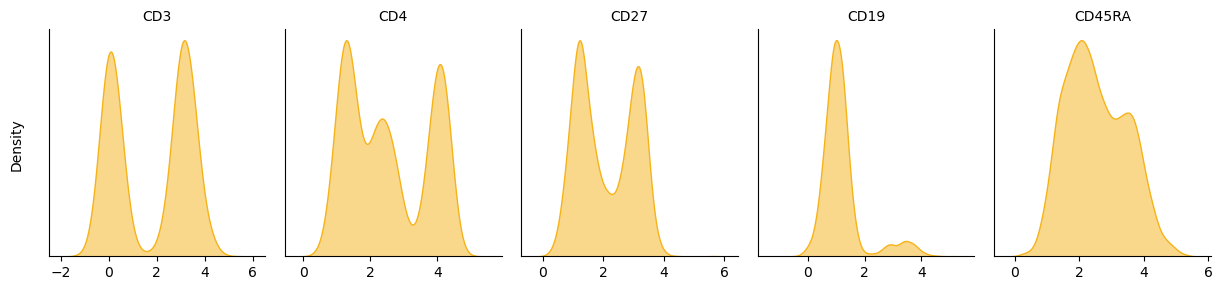

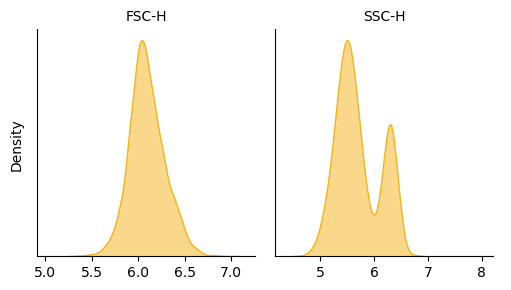

In [6]:
# plot scatter feature and markers; transformed layer
cytovi.pl.histogram(adata_flow, marker= markers_to_plot, layer_key='transformed', col_wrap=5, kde_kwargs = aes_trans, save = figure_dir + 'flow_marker_histogram_transformed.pdf', aspect = aspect)
cytovi.pl.histogram(adata_flow, marker= ['FSC-H', 'SSC-H'], layer_key='transformed', col_wrap=2, kde_kwargs = aes_trans, save = figure_dir + 'scatter_feature_histogram_transformed.pdf', aspect = aspect)

## Part 3 - Mass cytometry

In [4]:
adata_cytof = ad.read('../data/raw/CyTOF/twins/surface/batch1/annotated/2024-01-16_norm_samples_batch1_ann.h5ad')

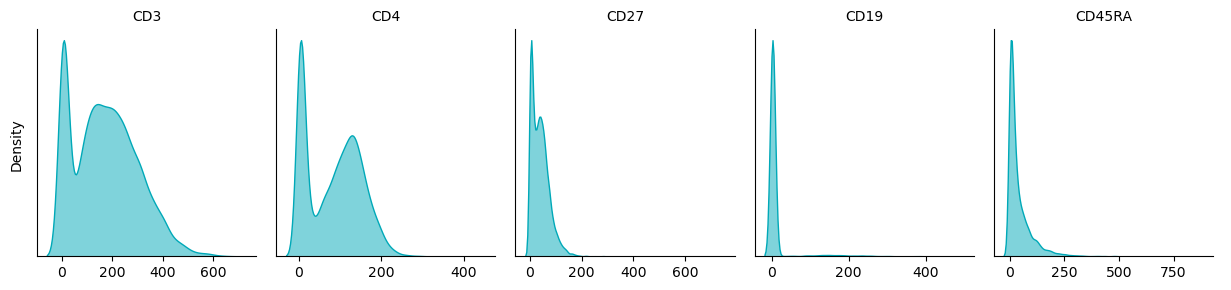

In [8]:
# plot markers; raw layer
cytovi.pl.histogram(adata_cytof, marker= markers_to_plot, layer_key='raw', col_wrap=5, kde_kwargs = aes_raw, save = figure_dir + 'cytof_marker_histogram_raw.pdf', aspect = aspect)

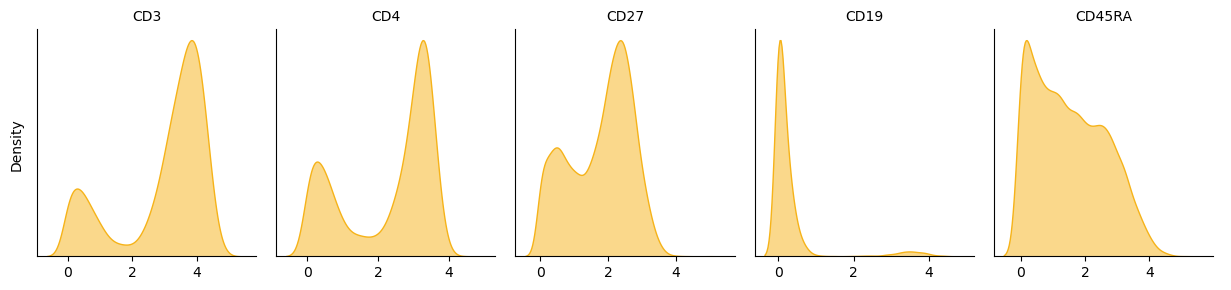

In [9]:
# plot scatter feature and markers; transformed layer
cytovi.pl.histogram(adata_cytof, marker= markers_to_plot, layer_key='transformed', col_wrap=5, kde_kwargs = aes_trans, save = figure_dir + 'cytof_marker_histogram_transformed.pdf', aspect = aspect)

## Part 4 - CITE-seq

In [5]:
adata_cite_seq = ad.read_h5ad('../data/raw/CITE_seq/Seurat_PBMC/2024-02-16_cite_seq_processed.h5ad')
adata_cite_seq = adata_cite_seq[adata_cite_seq.obs['orig.ident'].isin(['P7_0'])].copy()

In [93]:
# save adata
# adata_cite_seq.write('../data/raw/CITE_seq/Seurat_PBMC/2024-05-22_cite_seq_processed_P7_only.h5ad')

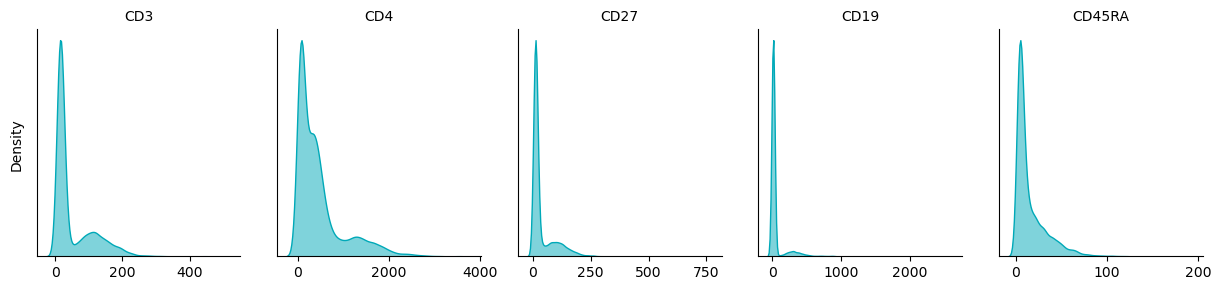

In [90]:
# plot markers; raw layer
cytovi.pl.histogram(adata_cite_seq, marker= markers_to_plot, layer_key='raw', col_wrap=5, kde_kwargs = aes_raw, save = figure_dir + 'cite_seq_marker_histogram_raw.pdf', aspect = aspect)

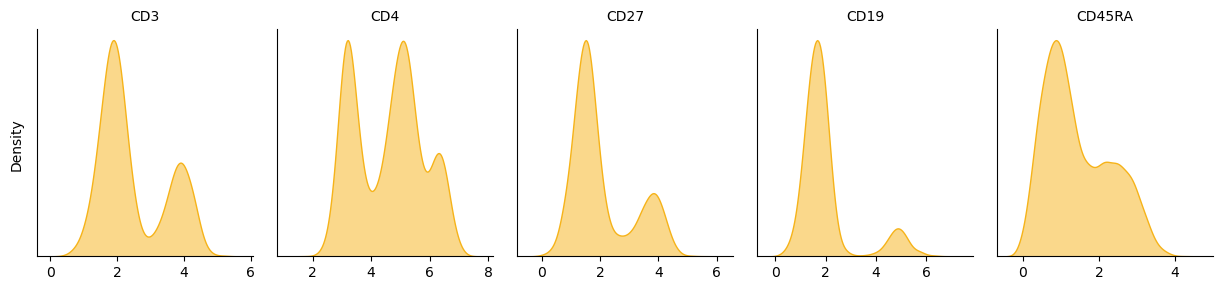

In [91]:
# plot markers; transformed layer
cytovi.pl.histogram(adata_cite_seq, marker= markers_to_plot, layer_key='transformed', col_wrap=5, kde_kwargs = aes_trans, save = figure_dir + 'cite_seq_marker_histogram_transformed.pdf', aspect = aspect)

# PPCs for each technology

## Part 1 - Flow cytometry

In [6]:
# load cytometry models into dict
model_path = '../models/dist_eval'
file_names = os.listdir(model_path)
model_names_flow = [file for file in file_names if file.startswith('2024-07-10_aurora_')]

model_dict_flow = {}
for model_name in model_names_flow:
    model_key = model_name.split('2024-07-10_aurora_')[1]
    model = cytovi.CytoVI.load(model_path + '/' + model_name, adata = adata_flow)
    model_dict_flow[model_key] = model

INFO     File ../models/dist_eval/2024-07-10_aurora_beta/model.pt already downloaded                               
INFO     File ../models/dist_eval/2024-07-10_aurora_normal/model.pt already downloaded                             
INFO     File ../models/dist_eval/2024-07-10_aurora_normal_scaled/model.pt already downloaded                      


In [11]:
# PPCs
model_dict_flow_scaled = {k: model_dict_flow[k] for k in ('normal_scaled', 'beta')}
model_dict_flow_trans = {k: v for k, v in model_dict_flow.items() if k not in ('normal_scaled', 'beta')}

train_indices = model_dict_flow_scaled['normal_scaled'].train_indices

# run metrics
ppc_scaled = cytovi.tl.PosteriorPredictiveCheck(adata_flow, model_dict_flow_scaled, layer_key='scaled')
ppc_scaled.store_FA_samples(train_indices = train_indices)
ppc_scaled.compute_metrics()
ppc_scaled.compute_summary_statistics()

ppc_trans = cytovi.tl.PosteriorPredictiveCheck(adata_flow, model_dict_flow_trans, layer_key='transformed')
ppc_trans.store_FA_samples(train_indices = train_indices)
ppc_trans.compute_metrics()
ppc_trans.compute_summary_statistics()

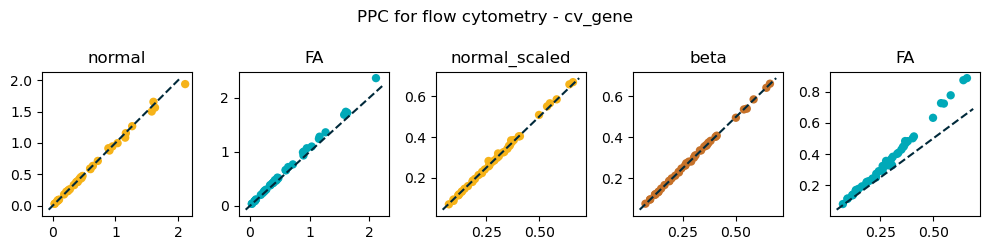

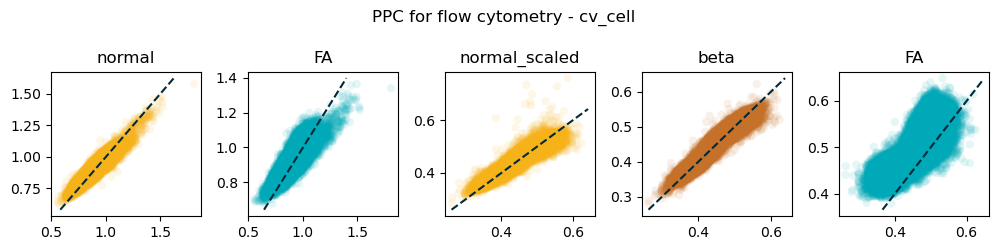

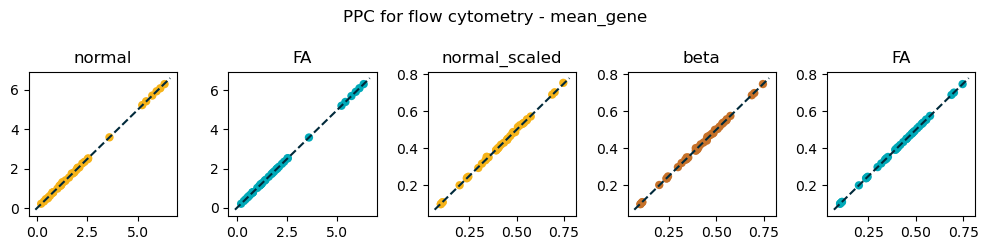

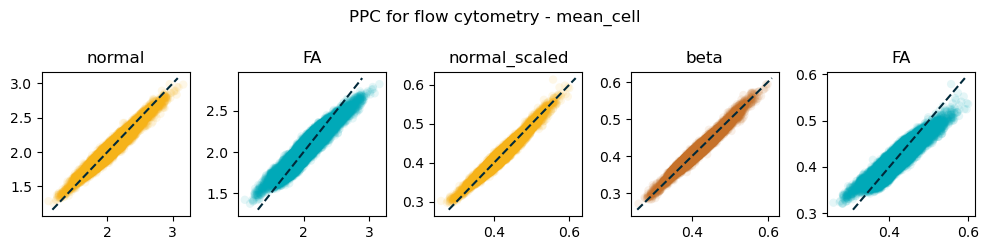

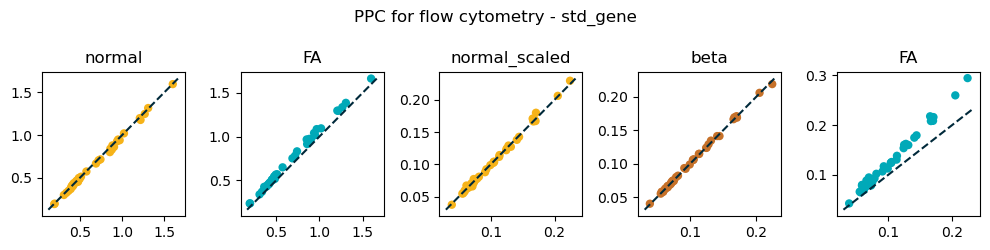

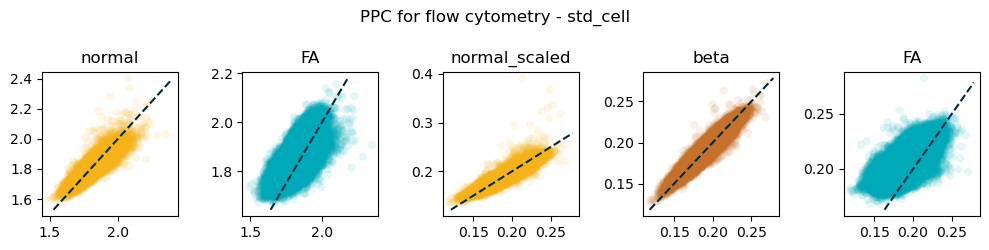

In [12]:
# scatter plots for ppcs
model_pal2 = {'FA': '#00A9B8', 'normal': '#F6B319', 'beta': '#C67129', 'normal_scaled': '#F6B319'}

for metric in ppc_scaled.metrics.keys():
    fig, axes = plt.subplots(1, 5, figsize=(5*2, 2.5))
    fig.suptitle(f'PPC for flow cytometry - {metric}')
    it = 0

    alpha = 0.1 if metric.endswith('cell') else 1   

    # transformed models    
    for model_key in ppc_trans.models.keys():
        g = sns.scatterplot(ppc_trans.metrics[metric], x='Raw', y=model_key, ax=axes[it], edgecolor='none', alpha=alpha, color = model_pal2[model_key])
        g.set_title(model_key)
        x0, x1 = g.get_xlim()
        y0, y1 = g.get_ylim()
        lims = [max(x0, y0), min(x1, y1)]
        g.plot(lims, lims, color="#00293A", linestyle="dashed", label="x=y")
        g.set_ylabel('')
        g.set_xlabel('')
        it += 1
        
    # add scaled layer models
    for model_key in ppc_scaled.models.keys():
        g = sns.scatterplot(ppc_scaled.metrics[metric], x='Raw', y=model_key, ax=axes[it], edgecolor='none', alpha=alpha, color = model_pal2[model_key])
        g.set_title(model_key)
        x0, x1 = g.get_xlim()
        y0, y1 = g.get_ylim()
        lims = [max(x0, y0), min(x1, y1)]
        g.plot(lims, lims, color="#00293A", linestyle="dashed", label="x=y")
        g.set_ylabel('')
        g.set_xlabel('')
        it += 1
    fig.tight_layout()
    fig.savefig(f'{figure_dir}ppc_scatter_{metric}.png')


In [10]:
delta_colnames = ['CytoVI_normal_trans', 'FA_trans', 'CytoVI_normal_scaled', 'CytoVI_beta_scaled', 'FA_scaled']
model_pal = {'Raw_trans': '#545454', 'Raw_scaled': '#545454', 'FA_trans': '#00A9B8', 'FA_scaled': '#00A9B8', 'CytoVI_normal_trans': '#F6B319', 'CytoVI_beta_scaled': '#C67129', 'CytoVI_normal_scaled': '#F6B319'}


def combine_cv_df(ppc_trans, ppc_scaled, metric):
    cv_df_trans = ppc_trans.metrics[metric].copy()
    cv_df_trans = cv_df_trans.add_suffix('_trans')
    
    cv_df_scaled = ppc_scaled.metrics[metric].copy()
    cv_df_scaled = cv_df_scaled.add_suffix('_scaled')
    
    cv_df = pd.concat([cv_df_trans, cv_df_scaled], axis=1)
    return cv_df

def compute_delta_cv(cv_df):
    cv_df_delta = cv_df.copy()
    
    for col in cv_df_delta.columns:
        if col.endswith('_trans'):
            cv_df_delta[col] = cv_df[col] - cv_df['Raw_trans'].values
        elif col.endswith('_scaled'):
            cv_df_delta[col] = cv_df[col] - cv_df['Raw_scaled'].values
    
    cv_df_delta = cv_df_delta.drop(columns=['Raw_trans', 'Raw_scaled'])
    return cv_df_delta

def collect_summary_stats(ppc_trans, ppc_scaled, metric):
    cv_summary_trans = ppc_trans.summary_statistics[metric].copy()
    cv_summary_trans = cv_summary_trans.add_suffix('_trans')
    
    cv_summary_scaled = ppc_scaled.summary_statistics[metric].copy()
    cv_summary_scaled = cv_summary_scaled.add_suffix('_scaled')
    
    cv_summary_df = pd.concat([cv_summary_trans, cv_summary_scaled], axis=1)
    cv_summary_df.update(cv_summary_df.astype(float))
    cv_summary_df.update(cv_summary_df.applymap('{:,.2f}'.format))
    
    return cv_summary_df

def plot_delta_cv_violin(cv_df_delta, cv_summary_df, order_delta = None, palette = model_pal, figure_dir = figure_dir, save_str = ''):
    fig, ax = plt.subplots(figsize=(4, 3))
    
    if order_delta is None:
        order_delta = [*cv_df_delta.columns]
        
    sns.violinplot(data=cv_df_delta, scale='width', order=order_delta, palette=palette, ax=ax, zorder=1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_ylabel('delta CV(observed - raw)')
    ax.axhline(y=0, color='lightgrey', linestyle='--', zorder=0)
    ax.table(cellText=cv_summary_df.values, rowLabels=cv_summary_df.index, loc="top", cellLoc="center").scale(1, 1.5)
    fig.savefig(f'{figure_dir}cv_delta_violin_{save_str}.pdf')

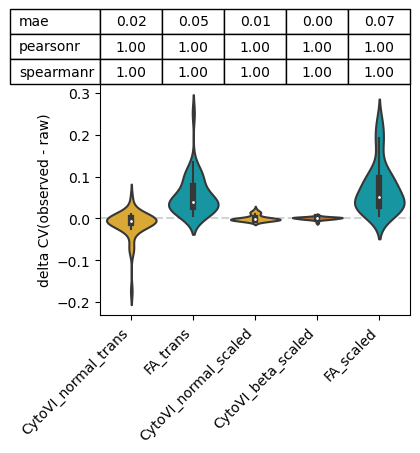

In [16]:
# collect delta CVs in violin plots for protein axis
cv_df = combine_cv_df(ppc_trans, ppc_scaled, metric = 'cv_gene')
cv_df_delta = compute_delta_cv(cv_df)
cv_df_delta.columns = delta_colnames
cv_df_sum = collect_summary_stats(ppc_trans, ppc_scaled, 'cv_gene')
cv_df_sum.columns = delta_colnames


plot_delta_cv_violin(cv_df_delta, cv_df_sum, save_str = 'proteins')

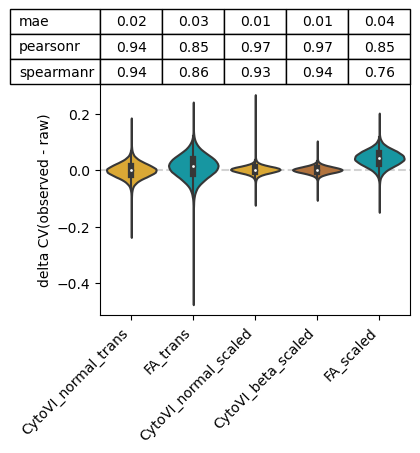

In [17]:
# repeat for cell axis
cv_df_cells = combine_cv_df(ppc_trans, ppc_scaled, metric = 'cv_cell')
cv_df_delta_cells = compute_delta_cv(cv_df_cells)
cv_df_delta_cells.columns = delta_colnames
cv_df_sum_cells = collect_summary_stats(ppc_trans, ppc_scaled, 'cv_cell')
cv_df_sum_cells.columns = delta_colnames

plot_delta_cv_violin(cv_df_delta_cells, cv_df_sum_cells, save_str = 'cells')

## Part 2 - Mass cytometry

### Inspect training and latent space

In [78]:
# adata_cytof_sub = cytovi.pp.subsample(adata_cytof, n_obs = 100000, groupby = 'sample_id')
# adata_cytof_sub.write('../data/raw/CyTOF/twins/surface/batch1/annotated/2024-05-22_norm_samples_batch1_ann_100k.h5ad')

In [3]:
adata_cytof_sub = ad.read_h5ad('../data/raw/CyTOF/twins/surface/batch1/annotated/2024-05-22_norm_samples_batch1_ann_100k.h5ad')
rm_vars = ['CD138']
adata_cytof_sub = adata_cytof_sub[:, [var for var in adata_cytof_sub.var_names if var not in rm_vars]].copy()

In [4]:
# load cytometry models into dict
model_path = '../models/dist_eval'
file_names = os.listdir(model_path)
model_names_cytof = [file for file in file_names if file.startswith('2024-10-11_CyTOF_')]

model_dict_cytof = {}
for model_name in model_names_cytof:
    model_key = model_name.split('2024-10-11_CyTOF_')[1]
    model = cytovi.CytoVI.load(model_path + '/' + model_name, adata = adata_cytof_sub)
    model_dict_cytof[model_key] = model

INFO     File ../models/dist_eval/2024-10-11_CyTOF_normal_scaled/model.pt already downloaded                       


/home/labs/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torc

INFO     File ../models/dist_eval/2024-10-11_CyTOF_normal/model.pt already downloaded                              
INFO     File ../models/dist_eval/2024-10-11_CyTOF_beta/model.pt already downloaded                                


/home/labs/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torc

In [5]:
# PPCs
model_dict_cytof_scaled = {k: model_dict_cytof[k] for k in ('normal_scaled', 'beta')}
model_dict_cytof_trans = {k: v for k, v in model_dict_cytof.items() if k not in ('normal_scaled', 'beta')}

train_indices = model_dict_cytof_scaled['normal_scaled'].train_indices

# run metrics
ppc_scaled = cytovi.tl.PosteriorPredictiveCheck(adata_cytof_sub, model_dict_cytof_scaled, layer_key='scaled')
ppc_scaled.store_FA_samples(train_indices = train_indices)
ppc_scaled.compute_metrics()
ppc_scaled.compute_summary_statistics()

ppc_trans = cytovi.tl.PosteriorPredictiveCheck(adata_cytof_sub, model_dict_cytof_trans, layer_key='transformed')
ppc_trans.store_FA_samples(train_indices = train_indices)
ppc_trans.compute_metrics()
ppc_trans.compute_summary_statistics()

In [7]:
model_pal2 = {'FA': '#00A9B8', 'normal': '#F6B319', 'beta': '#C67129', 'normal_scaled': '#F6B319'}

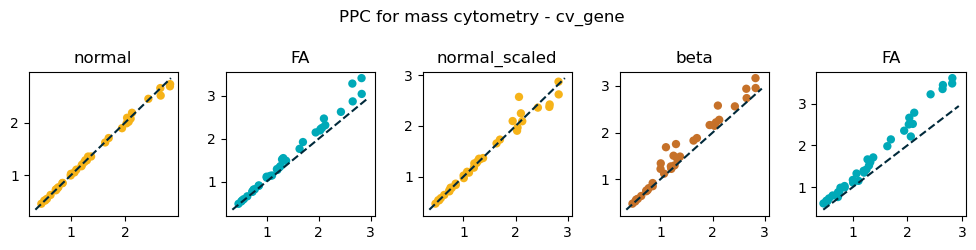

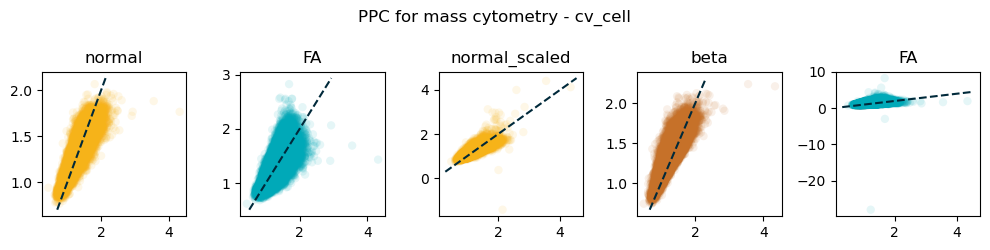

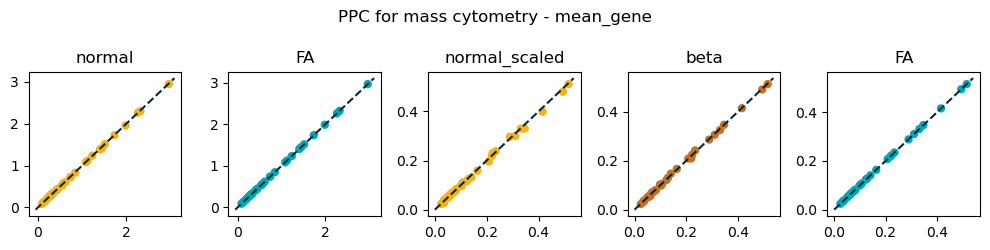

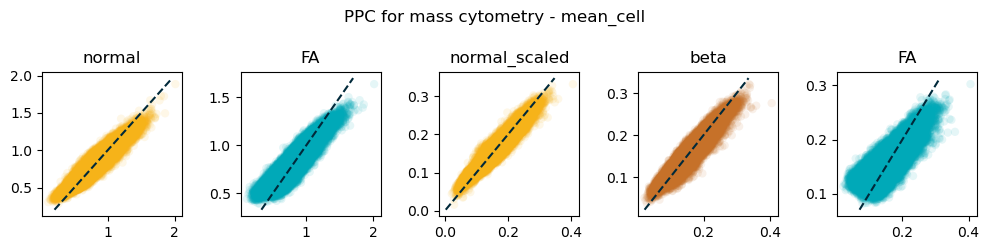

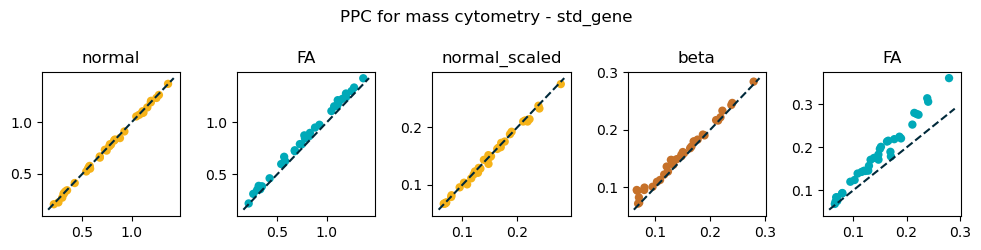

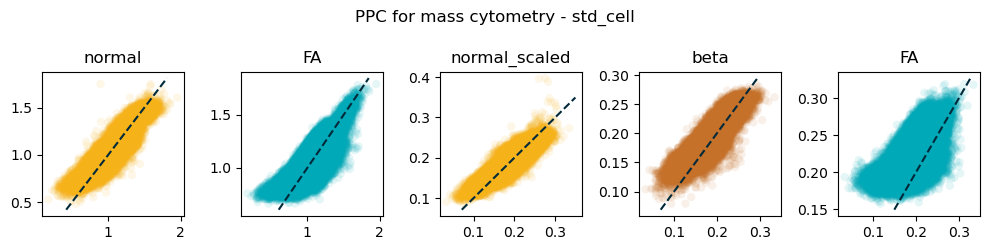

In [8]:
# scatter plots for ppcs
for metric in ppc_scaled.metrics.keys():
    fig, axes = plt.subplots(1, 5, figsize=(5*2, 2.5))
    fig.suptitle(f'PPC for mass cytometry - {metric}')
    it = 0

    alpha = 0.1 if metric.endswith('cell') else 1   

    # transformed models    
    for model_key in ppc_trans.models.keys():
        g = sns.scatterplot(ppc_trans.metrics[metric], x='Raw', y=model_key, ax=axes[it], edgecolor='none', alpha=alpha, color = model_pal2[model_key])
        g.set_title(model_key)
        x0, x1 = g.get_xlim()
        y0, y1 = g.get_ylim()
        lims = [max(x0, y0), min(x1, y1)]
        g.plot(lims, lims, color="#00293A", linestyle="dashed", label="x=y")
        g.set_ylabel('')
        g.set_xlabel('')
        it += 1
        
    # add scaled layer models
    for model_key in ppc_scaled.models.keys():
        g = sns.scatterplot(ppc_scaled.metrics[metric], x='Raw', y=model_key, ax=axes[it], edgecolor='none', alpha=alpha, color = model_pal2[model_key])
        g.set_title(model_key)
        x0, x1 = g.get_xlim()
        y0, y1 = g.get_ylim()
        lims = [max(x0, y0), min(x1, y1)]
        g.plot(lims, lims, color="#00293A", linestyle="dashed", label="x=y")
        g.set_ylabel('')
        g.set_xlabel('')
        it += 1
    fig.tight_layout()
    fig.savefig(f'{figure_dir}ppc_cytof_{metric}.png')


/tmp/ipykernel_563575/2202334131.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cv_summary_df.update(cv_summary_df.applymap('{:,.2f}'.format))
/tmp/ipykernel_563575/2202334131.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.03' '1.00' '1.00']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cv_summary_df.update(cv_summary_df.applymap('{:,.2f}'.format))
/tmp/ipykernel_563575/2202334131.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.15' '0.99' '1.00']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cv_summary_df.update(cv_summary_df.applymap('{:,.2f}'.format))
/tmp/ipykernel_563575/2202334131.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error o

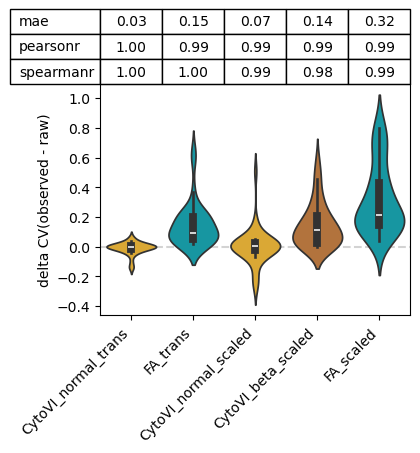

In [11]:
# collect delta CVs in violin plots for protein axis
delta_colnames = ['CytoVI_normal_trans', 'FA_trans', 'CytoVI_normal_scaled', 'CytoVI_beta_scaled', 'FA_scaled']
model_pal = {'Raw_trans': '#545454', 'Raw_scaled': '#545454', 'FA_trans': '#00A9B8', 'FA_scaled': '#00A9B8', 'CytoVI_normal_trans': '#F6B319', 'CytoVI_beta_scaled': '#C67129', 'CytoVI_normal_scaled': '#F6B319'}

cv_df = combine_cv_df(ppc_trans, ppc_scaled, metric = 'cv_gene')
cv_df_delta = compute_delta_cv(cv_df)
cv_df_delta.columns = delta_colnames
cv_df_sum = collect_summary_stats(ppc_trans, ppc_scaled, 'cv_gene')
cv_df_sum.columns = delta_colnames

plot_delta_cv_violin(cv_df_delta, cv_df_sum, save_str = 'cytof_proteins')

/tmp/ipykernel_563575/2202334131.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cv_summary_df.update(cv_summary_df.applymap('{:,.2f}'.format))
/tmp/ipykernel_563575/2202334131.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.07' '0.85' '0.83']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cv_summary_df.update(cv_summary_df.applymap('{:,.2f}'.format))
/tmp/ipykernel_563575/2202334131.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.13' '0.68' '0.66']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cv_summary_df.update(cv_summary_df.applymap('{:,.2f}'.format))
/tmp/ipykernel_563575/2202334131.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error o

/tmp/ipykernel_563575/2202334131.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


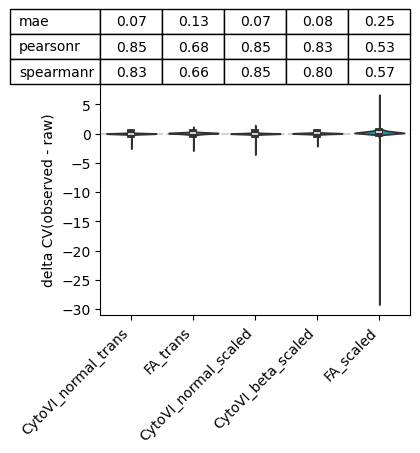

In [12]:
# repeat for cell axis
cv_df_cells = combine_cv_df(ppc_trans, ppc_scaled, metric = 'cv_cell')
cv_df_delta_cells = compute_delta_cv(cv_df_cells)
cv_df_delta_cells.columns = delta_colnames
cv_df_sum_cells = collect_summary_stats(ppc_trans, ppc_scaled, 'cv_cell')
cv_df_sum_cells.columns = delta_colnames

plot_delta_cv_violin(cv_df_delta_cells, cv_df_sum_cells, save_str = 'cytof_cells')

## Part 2 - CITE-seq

In [30]:
# load cytometry models into dict
model_path = '../models/dist_eval'
file_names = os.listdir(model_path)
model_names_citeseq = [file for file in file_names if file.startswith('2024-07-10_CITE_seq_')]

model_dict_citeseq = {}
for model_name in model_names_citeseq:
    model_key = model_name.split('2024-07-10_CITE_seq_')[1]
    model = cytovi.CytoVI.load(model_path + '/' + model_name, adata = adata_cite_seq)
    model_dict_citeseq[model_key] = model

INFO     File ../models/dist_eval/2024-07-10_CITE_seq_beta/model.pt already downloaded                             
INFO     File ../models/dist_eval/2024-07-10_CITE_seq_normal_scaled/model.pt already downloaded                    
INFO     File ../models/dist_eval/2024-07-10_CITE_seq_normal/model.pt already downloaded                           


### PPCs

In [35]:
# PPCs
model_dict_citeseq_scaled = {k: model_dict_citeseq[k] for k in ('normal_scaled', 'beta')}
model_dict_citeseq_trans = {k: v for k, v in model_dict_citeseq.items() if k not in ('normal_scaled', 'beta')}

train_indices = model_dict_citeseq_scaled['normal_scaled'].train_indices

# run metrics
ppc_scaled = cytovi.tl.PosteriorPredictiveCheck(adata_cite_seq, model_dict_citeseq_scaled, layer_key='scaled')
ppc_scaled.store_FA_samples(train_indices = train_indices)
ppc_scaled.compute_metrics()
ppc_scaled.compute_summary_statistics()

ppc_trans = cytovi.tl.PosteriorPredictiveCheck(adata_cite_seq, model_dict_citeseq_trans, layer_key='transformed')
ppc_trans.store_FA_samples(train_indices = train_indices)
ppc_trans.compute_metrics()
ppc_trans.compute_summary_statistics()

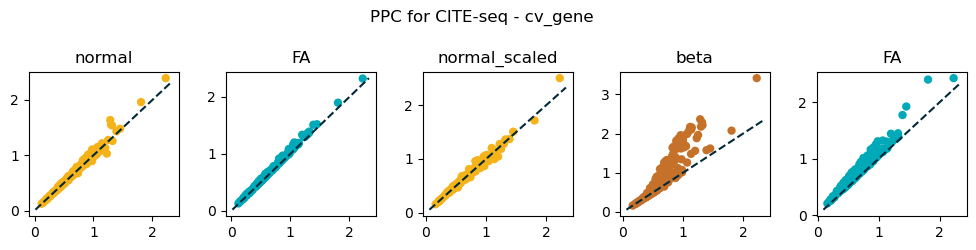

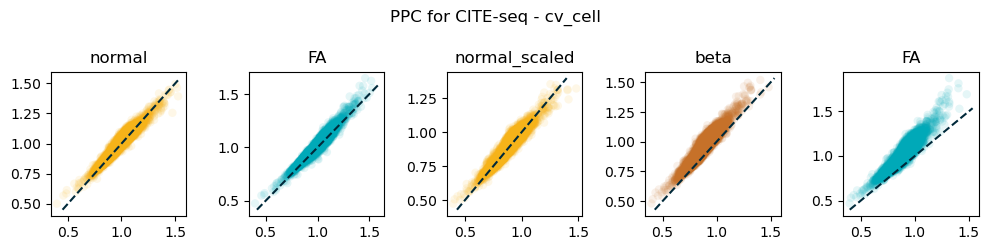

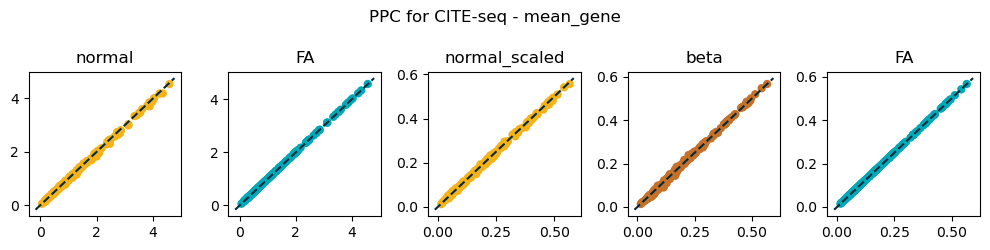

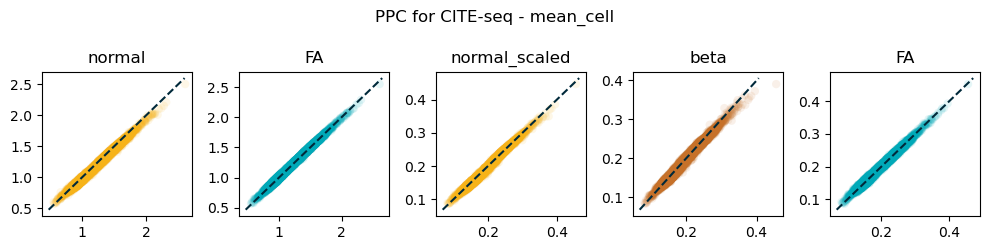

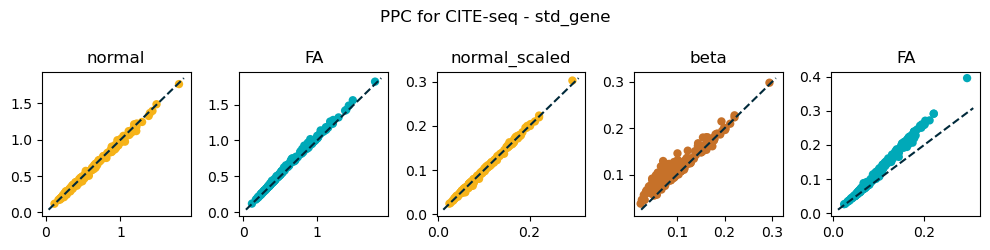

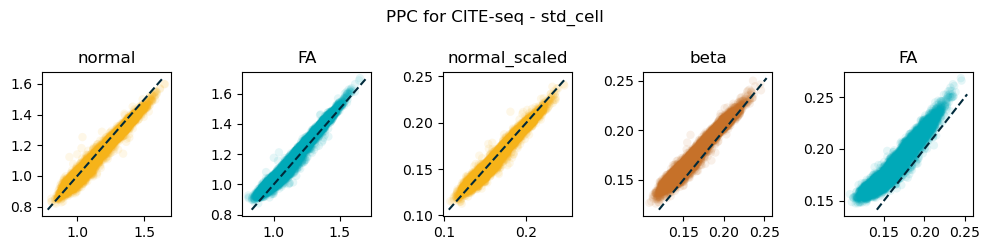

In [36]:
# scatter plots for ppcs
for metric in ppc_scaled.metrics.keys():
    fig, axes = plt.subplots(1, 5, figsize=(5*2, 2.5))
    fig.suptitle(f'PPC for CITE-seq - {metric}')
    it = 0

    alpha = 0.1 if metric.endswith('cell') else 1   

    # transformed models    
    for model_key in ppc_trans.models.keys():
        g = sns.scatterplot(ppc_trans.metrics[metric], x='Raw', y=model_key, ax=axes[it], edgecolor='none', alpha=alpha, color = model_pal2[model_key])
        g.set_title(model_key)
        x0, x1 = g.get_xlim()
        y0, y1 = g.get_ylim()
        lims = [max(x0, y0), min(x1, y1)]
        g.plot(lims, lims, color="#00293A", linestyle="dashed", label="x=y")
        g.set_ylabel('')
        g.set_xlabel('')
        it += 1
        
    # add scaled layer models
    for model_key in ppc_scaled.models.keys():
        g = sns.scatterplot(ppc_scaled.metrics[metric], x='Raw', y=model_key, ax=axes[it], edgecolor='none', alpha=alpha, color = model_pal2[model_key])
        g.set_title(model_key)
        x0, x1 = g.get_xlim()
        y0, y1 = g.get_ylim()
        lims = [max(x0, y0), min(x1, y1)]
        g.plot(lims, lims, color="#00293A", linestyle="dashed", label="x=y")
        g.set_ylabel('')
        g.set_xlabel('')
        it += 1
    fig.tight_layout()
    fig.savefig(f'{figure_dir}ppc_citeseq_{metric}.png')


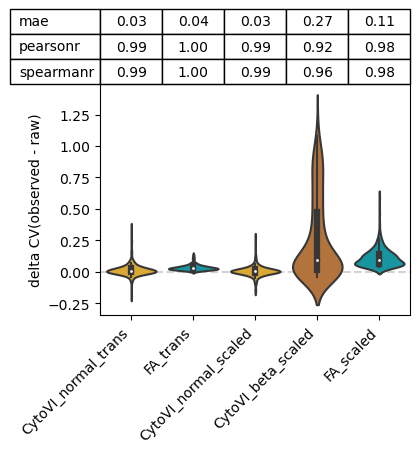

In [37]:
# collect delta CVs in violin plots for protein axis
cv_df = combine_cv_df(ppc_trans, ppc_scaled, metric = 'cv_gene')
cv_df_delta = compute_delta_cv(cv_df)
cv_df_delta.columns = delta_colnames
cv_df_sum = collect_summary_stats(ppc_trans, ppc_scaled, 'cv_gene')
cv_df_sum.columns = delta_colnames

plot_delta_cv_violin(cv_df_delta, cv_df_sum, save_str = 'citeseq_proteins')

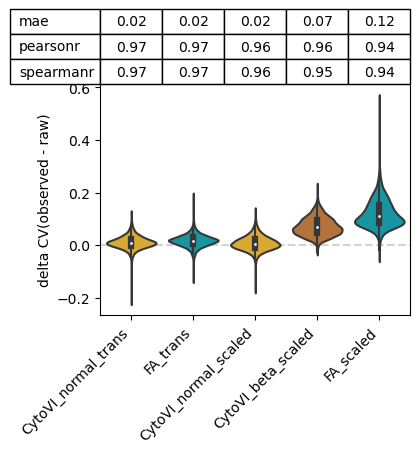

In [38]:
# repeat for cell axis
cv_df_cells = combine_cv_df(ppc_trans, ppc_scaled, metric = 'cv_cell')
cv_df_delta_cells = compute_delta_cv(cv_df_cells)
cv_df_delta_cells.columns = delta_colnames
cv_df_sum_cells = collect_summary_stats(ppc_trans, ppc_scaled, 'cv_cell')
cv_df_sum_cells.columns = delta_colnames

plot_delta_cv_violin(cv_df_delta_cells, cv_df_sum_cells, save_str = 'citeseq_cells')